In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2024-09-27 06:59:55.623496: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-27 06:59:55.640176: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-27 06:59:55.653612: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-27 06:59:55.667947: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-27 06:59:55.673182: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-27 06:59:55.751690: I tensorflow/core/platform/cpu_feature_gu

In [3]:
data_path = '/workspaces/Tensorflowserve/Creditcard_fraud/data/archive (1).zip'
data = pd.read_csv(data_path)
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:

data.isnull().sum().max()

0

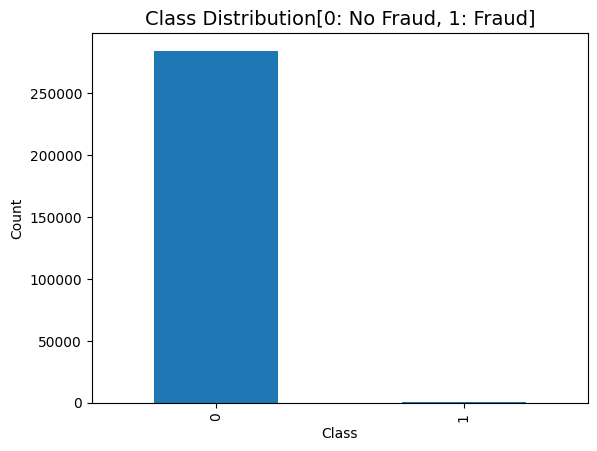

Number of Fraud Cases:  492
Number of Non-Fraud Cases:  284315


In [7]:
# Plottting the Class Distribution
data.Class.value_counts().plot(kind='bar')
plt.title('Class Distribution[0: No Fraud, 1: Fraud]', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
y=[data['Class'].value_counts()[0],data['Class'].value_counts()[1]]
print("Number of Fraud Cases: ",y[1])
print("Number of Non-Fraud Cases: ",y[0])

In [8]:
df = data
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

AttributeError: 'DataFrame' object has no attribute 'amt'

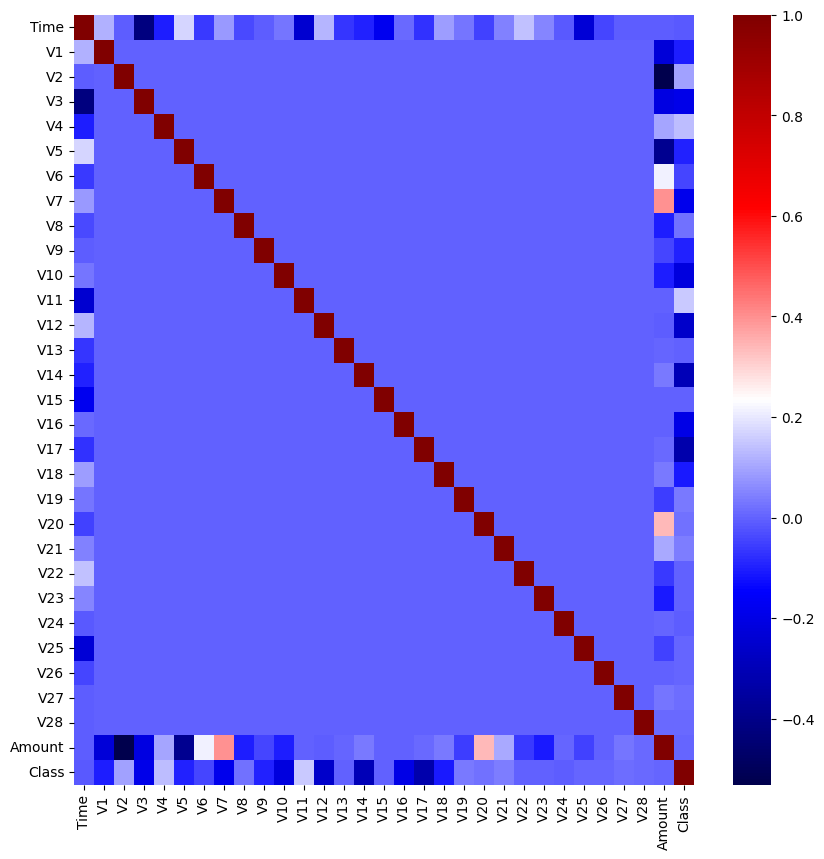

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap="seismic")
plt.show()

(0.0, 0.005)

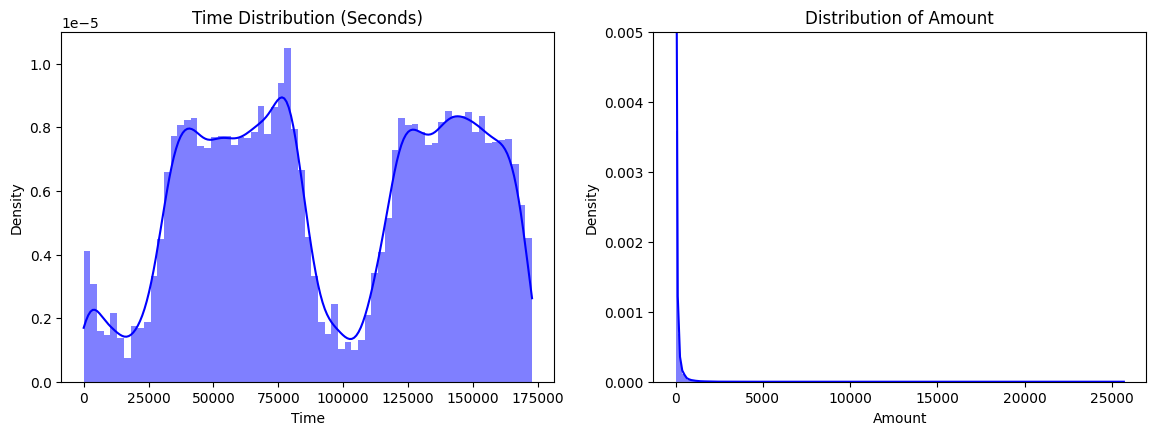

In [35]:
# plot the time feature
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.histplot(data['Time'], color='blue', kde=True, stat="density", linewidth=0)

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.histplot(data['Amount'],color='blue', kde=True, stat="density", linewidth=0)
plt.ylim(0, 0.0050)

/tmp/ipykernel_15899/4281342502.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[data.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

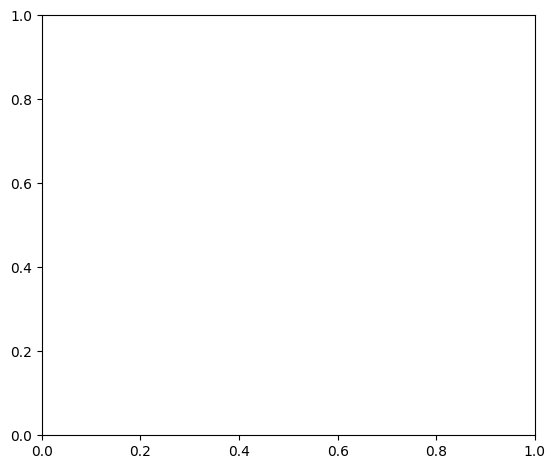

In [36]:
# Plot histogram of Time with respect to Class
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
df[data.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
df[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [11]:
ss = StandardScaler()
preprocess = ColumnTransformer(transformers=[('Time_drp','drop',['Time']),('Standard_Scaler',ss, ['Amount'])],remainder='passthrough')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Splitting the data into train and test
X = data.drop(['Class'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = preprocess.fit_transform(X_train)
X_test = preprocess.transform(X_test)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (227845, 29)
Number transactions y_train dataset:  (227845,)
Number transactions X_test dataset:  (56962, 29)
Number transactions y_test dataset:  (56962,)


In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 394
Before OverSampling, counts of label '0': 227451 

After OverSampling, the shape of train_X: (454902, 29)
After OverSampling, the shape of train_y: (454902,) 

After OverSampling, counts of label '1': 227451


/tmp/ipykernel_49344/1055037709.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


After OverSampling, counts of label '0': 227451


In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y_train_res)
plt.title('Class Distribution [After OverSampling]', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

KeyboardInterrupt: 

In [16]:
# Making a Neural Network
n_inputs = X_train_res.shape[1]
model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.33),
    BatchNormalization(),
    Dense(2, activation='softmax')
])

/opt/conda/envs/myenvv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
from keras.callbacks import EarlyStopping

In [19]:
callback = EarlyStopping(monitor='val_loss',patience=3)
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 29)             │           870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,024 (7.91 KB)

 Trainable params: 1,960 (7.66 KB)

 Non-trainable params: 64 (256.00 B)

In [21]:
model.fit(X_train_res, y_train_res, validation_split=0.2,epochs=30, batch_size=350,verbose=1,callbacks=[callback])


Epoch 1/30
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9983 - loss: 0.0071 - val_accuracy: 1.0000 - val_loss: 9.0156e-04
Epoch 2/30
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9984 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 7.4581e-04
Epoch 3/30
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9986 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 4/30
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9988 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 4.9611e-04
Epoch 5/30
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9988 - loss: 0.0048 - val_accuracy: 0.9989 - val_loss: 0.0039
Epoch 6/30
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9987 - loss: 0.0047 - val_accuracy: 0.9995 - val_loss: 0.0026
Epoch 7/30
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9988 - loss: 0.0047 - val_accuracy: 0.9995 - val_loss: 0.0032


In [32]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc
import numpy as np

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.84      0.75        98

    accuracy                           1.00     56962
   macro avg       0.84      0.92      0.87     56962
weighted avg       1.00      1.00      1.00     56962



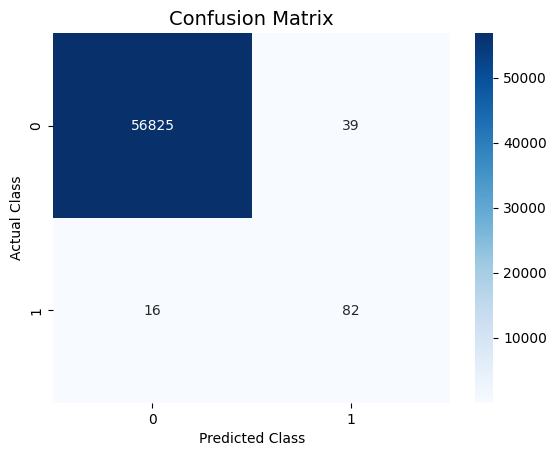

In [33]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

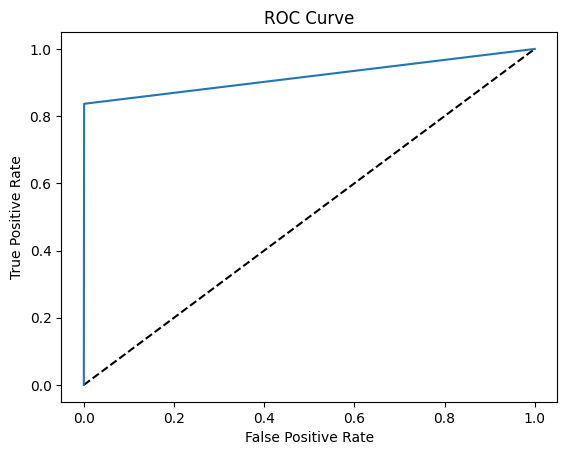

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [35]:
roc_auc = auc(fpr, tpr)
roc_auc

0.918024423472259

In [37]:
from sklearn.metrics import average_precision_score

In [38]:
# Area under the precision-recall curve
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.57


In [39]:
import os

In [40]:
# Save the model
model_save_path = "saved_model/model.h5"
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

export_path = os.path.join("serving_model", "model", "1")  # '1' is the version number
model.export(export_path)

Model saved to saved_model/model.h5
INFO:tensorflow:Assets written to: serving_model/model/1/assets


INFO:tensorflow:Assets written to: serving_model/model/1/assets


Saved artifact at 'serving_model/model/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 29), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  128039311497872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128039311500560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128039311500752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128039311499408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128039311498448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128039311499600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128039311500368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128039311501328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128039311499984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128039311502480: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [36]:
X_train,y_train,X_test,y_test,processed_data = data_processing(data)
y_train.value_counts()

NameError: name 'data_processing' is not defined